# Exploratory Data Analysis

In [3]:
pip install lightgbm

  Using cached lightgbm-3.3.2-py3-none-win_amd64.whl (1.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np

from sklearn.preprocessing            import LabelEncoder, OneHotEncoder 
from sklearn.preprocessing            import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.ensemble                 import VotingClassifier
from sklearn.metrics                  import f1_score

from xgboost                          import XGBClassifier
from catboost                         import CatBoostClassifier
from lightgbm                         import LGBMClassifier

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px


In [5]:
train=pd.read_csv("train_LZdllcl.csv")
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [6]:
test=pd.read_csv("test_2umaH9m.csv")
test.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [7]:
train.shape

(54808, 14)

In [8]:
test.shape

(23490, 13)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [11]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [12]:
test.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


<AxesSubplot:>

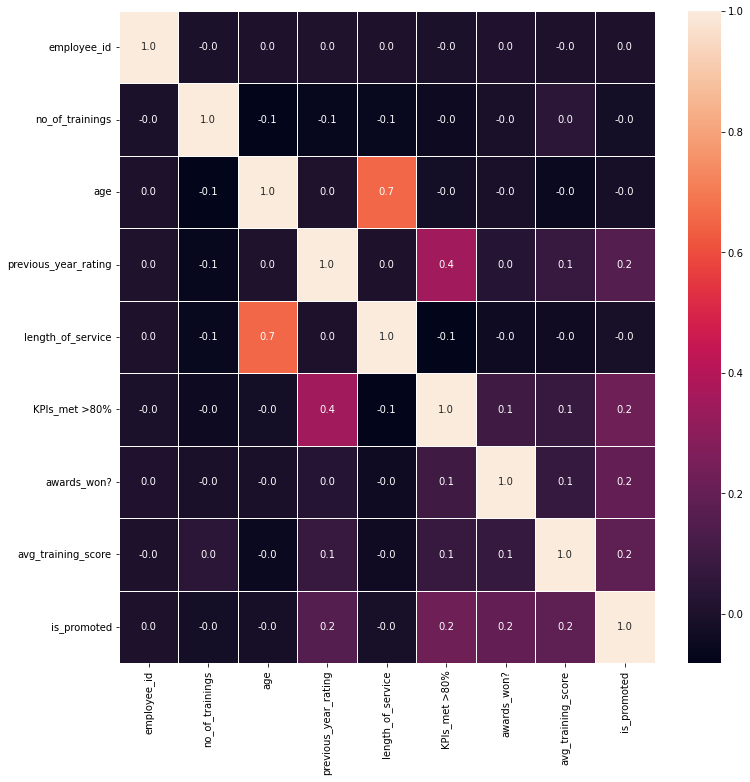

In [13]:
f,ax=plt.subplots(figsize=(12,12))
sns.heatmap(train.corr(),annot=True,linewidths=.5,fmt='.1f',ax=ax)

### check for duplicate Rows from Train Data

In [14]:
def remove_duplicate(data):
    data.drop_duplicates(keep="first",inplace=True)
    return "Checked Duplicates"

remove_duplicate(train)

'Checked Duplicates'

### fill missing values

In [15]:
train["previous_year_rating"]=train["previous_year_rating"].fillna(0)
test["previous_year_rating"]=test["previous_year_rating"].fillna(0)

### to create a new column to see if missing previous_year_rating and length_of_service=1 Year are related

In [16]:
train["Fresher"]=train["previous_year_rating"].apply(lambda x:"Fresher" if x==0 else "Experienced")

In [17]:
train[["previous_year_rating","length_of_service","Fresher"]][train["Fresher"]=="Fresher"]

,previous_year_rating,length_of_service,Fresher
10,0.0,1,Fresher
23,0.0,1,Fresher
29,0.0,1,Fresher
56,0.0,1,Fresher
58,0.0,1,Fresher
...,...,...,...
54703,0.0,1,Fresher
54734,0.0,1,Fresher
54746,0.0,1,Fresher
54773,0.0,1,Fresher


fill missing values

In [18]:
train["education"]=train["education"].ffill(axis=0)
train["education"]=train["education"].bfill(axis=0)
test["education"]=test["education"].bfill(axis=0)
test["education"]=test["education"].bfill(axis=0)


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54808 entries, 0 to 54807
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
 14  Fresher               54808 non-null  object 
dtypes: float64(1), int6

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             23490 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  23490 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


### feature selection

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

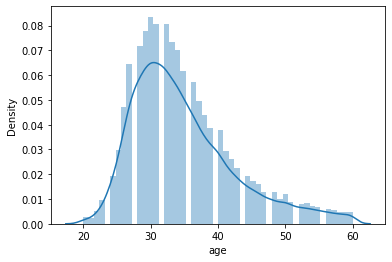

In [21]:
sns.distplot(train['age'])

In [22]:
train['age']=pd.cut(x=train['age'],bins=[20,29,39,49], labels=['20', '30', '40'] )
test['age']=pd.cut(x=test['age'],bins=[20,29,39,49], labels=['20', '30', '40'] )


In [23]:
x_train=train.drop('is_promoted',axis=1)
y_train=train['is_promoted']
y_train=y_train.to_frame()
x_test=test

### data encoding

In [24]:
def data_encoding( encoding_strategy , encoding_data , encoding_columns ):
    if encoding_strategy == "LabelEncoding":
        print("IF LabelEncoding")
        Encoder = LabelEncoder()
        for column in encoding_columns :
            print("column",column )
            encoding_data[ column ] = Encoder.fit_transform(tuple(encoding_data[ column ]))
    elif encoding_strategy == "OneHotEncoding":
        print("ELIF OneHotEncoding")
        encoding_data = pd.get_dummies(encoding_data)
    dtypes_list =['float64','float32','int64','int32']
    encoding_data.astype( dtypes_list[0] ).dtypes
    return encoding_data
encoding_columns  = [ "region", "age","department", "education", "gender", "recruitment_channel" ]
encoding_strategy = [ "LabelEncoding", "OneHotEncoding"]
X_train_encode = data_encoding( encoding_strategy[1] , x_train , encoding_columns )
X_test_encode =  data_encoding( encoding_strategy[1] , x_test  , encoding_columns )
# Display Encoded Train and Test Features :
display(X_train_encode.head())
display(X_test_encode.head())

ELIF OneHotEncoding
ELIF OneHotEncoding


,employee_id,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,age_20,age_30,age_40,Fresher_Experienced,Fresher_Fresher
0,65438,1,5.0,8,1,0,49,0,0,0,...,1,0,0,0,1,0,1,0,1,0
1,65141,1,5.0,4,0,0,60,0,0,0,...,0,1,1,0,0,0,1,0,1,0
2,7513,1,3.0,7,0,0,50,0,0,0,...,0,1,0,0,1,0,1,0,1,0
3,2542,2,1.0,10,0,0,50,0,0,0,...,0,1,1,0,0,0,1,0,1,0
4,48945,1,3.0,2,0,0,73,0,0,0,...,0,1,1,0,0,0,0,1,1,0


,employee_id,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,education_Below Secondary,education_Master's & above,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,age_20,age_30,age_40
0,8724,1,0.0,1,1,0,77,0,0,0,...,0,0,0,1,0,0,1,1,0,0
1,74430,1,3.0,5,0,0,51,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,72255,1,1.0,4,0,0,47,0,0,0,...,0,0,0,1,1,0,0,0,1,0
3,38562,3,2.0,9,0,0,65,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4,64486,1,4.0,7,0,0,61,0,1,0,...,0,0,0,1,0,0,1,0,1,0


In [25]:
def data_scaling( scaling_strategy , scaling_data , scaling_columns ):
    if    scaling_strategy =="RobustScaler" :
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    elif  scaling_strategy =="StandardScaler" :
        scaling_data[scaling_columns] = StandardScaler().fit_transform(scaling_data[scaling_columns])
    elif  scaling_strategy =="MinMaxScaler" :
        scaling_data[scaling_columns] = MinMaxScaler().fit_transform(scaling_data[scaling_columns])
    elif  scaling_strategy =="MaxAbsScaler" :
        scaling_data[scaling_columns] = MaxAbsScaler().fit_transform(scaling_data[scaling_columns])
    else :  # If any other scaling send by mistake still perform Robust Scalar
        scaling_data[scaling_columns] = RobustScaler().fit_transform(scaling_data[scaling_columns])
    return scaling_data
# RobustScaler is better in handling Outliers :
scaling_strategy = ["RobustScaler", "StandardScaler","MinMaxScaler","MaxAbsScaler"]
X_train_scale = data_scaling( scaling_strategy[0], X_train_encode , X_train_encode.columns )
X_test_scale  = data_scaling( scaling_strategy [0] , X_test_encode  , X_test_encode.columns )
# Display Scaled Train and Test Features :
display(X_train_scale.head())
display(X_train_scale.columns)
display(X_train_scale.head())

,employee_id,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,age_20,age_30,age_40,Fresher_Experienced,Fresher_Fresher
0,0.671070,0.0,1.0,0.75,1.0,0.0,-0.44,0.0,0.0,0.0,...,1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.663467,0.0,1.0,-0.25,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.811876,0.0,0.0,0.50,0.0,0.0,-0.40,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.939140,1.0,-1.0,1.25,0.0,0.0,-0.40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.248830,0.0,0.0,-0.75,0.0,0.0,0.52,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0


Index(['employee_id', 'no_of_trainings', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology',
       'region_region_1', 'region_region_10', 'region_region_11',
       'region_region_12', 'region_region_13', 'region_region_14',
       'region_region_15', 'region_region_16', 'region_region_17',
       'region_region_18', 'region_region_19', 'region_region_2',
       'region_region_20', 'region_region_21', 'region_region_22',
       'region_region_23', 'region_region_24', 'region_region_25',
       'region_region_26', 'region_region_27', 'region_region_28',
       'region_region_29', 'region_region_3', 'region_region_30',
       'region_region_31', 'region_region_32', 'region_region_33',
       'region_r

,employee_id,no_of_trainings,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Analytics,department_Finance,department_HR,...,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,age_20,age_30,age_40,Fresher_Experienced,Fresher_Fresher
0,0.671070,0.0,1.0,0.75,1.0,0.0,-0.44,0.0,0.0,0.0,...,1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.663467,0.0,1.0,-0.25,0.0,0.0,0.00,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.811876,0.0,0.0,0.50,0.0,0.0,-0.40,0.0,0.0,0.0,...,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.939140,1.0,-1.0,1.25,0.0,0.0,-0.40,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.248830,0.0,0.0,-0.75,0.0,0.0,0.52,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0.0,0.0
